# Medidas de dispersión

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('cars.csv')

In [2]:
# Desviación estandar
df['price_usd'].std()

6428.152018202915

In [3]:
# Rango = valor max - valor min
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [4]:
median = df['price_usd'].median()

Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)

min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1.0)

print(min_val, Q1, median, Q3, max_val)

1.0 2100.0 4800.0 8990.0 50000.0


In [5]:
# Quartiles
median = df['price_usd'].median()

Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)

min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1.0)

print(min_val, Q1, median, Q3, max_val)

1.0 2100.0 4800.0 8990.0 50000.0


In [6]:
# Rango intercuartil

iqr = Q3 - Q1

iqr

6890.0

### Límites para detección de outliers (datos simetricamente distribuidos)

Datos entre $$Q_1 -1.5 \times \text{IQR}$$ y $$Q_3 + 1.5 \times \text{IQR}$$

In [7]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr

print(f'rango para detección de outliers: {minlimit}, {maxlimit}')

rango para detección de outliers: -8235.0, 19325.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


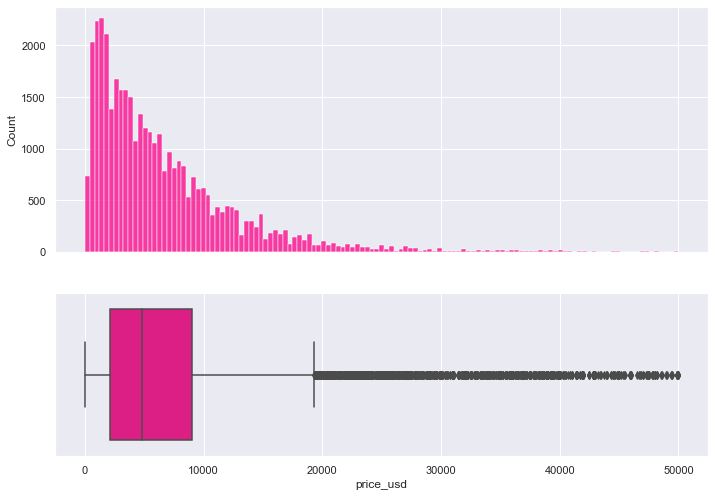

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})

sns.histplot(df['price_usd'], 
             ax=ax_hist, color='#FA0087')

sns.boxplot(df['price_usd'], 
            ax=ax_box, color='#FA0087')

ax_hist.set(xlabel='')

plt.show()

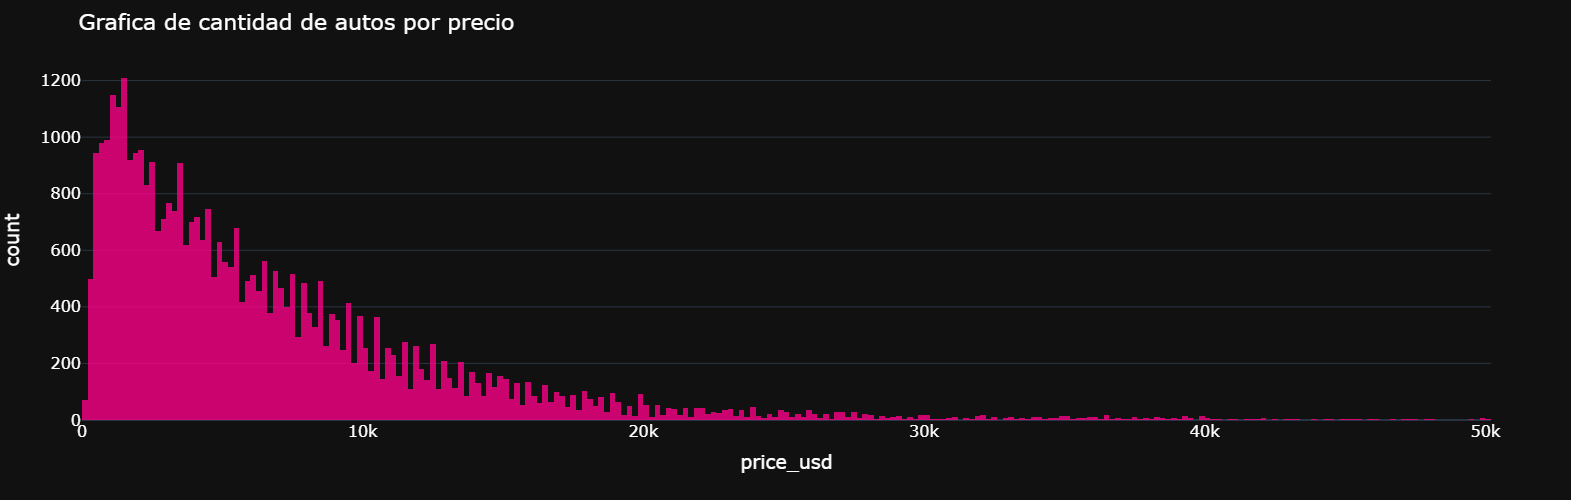

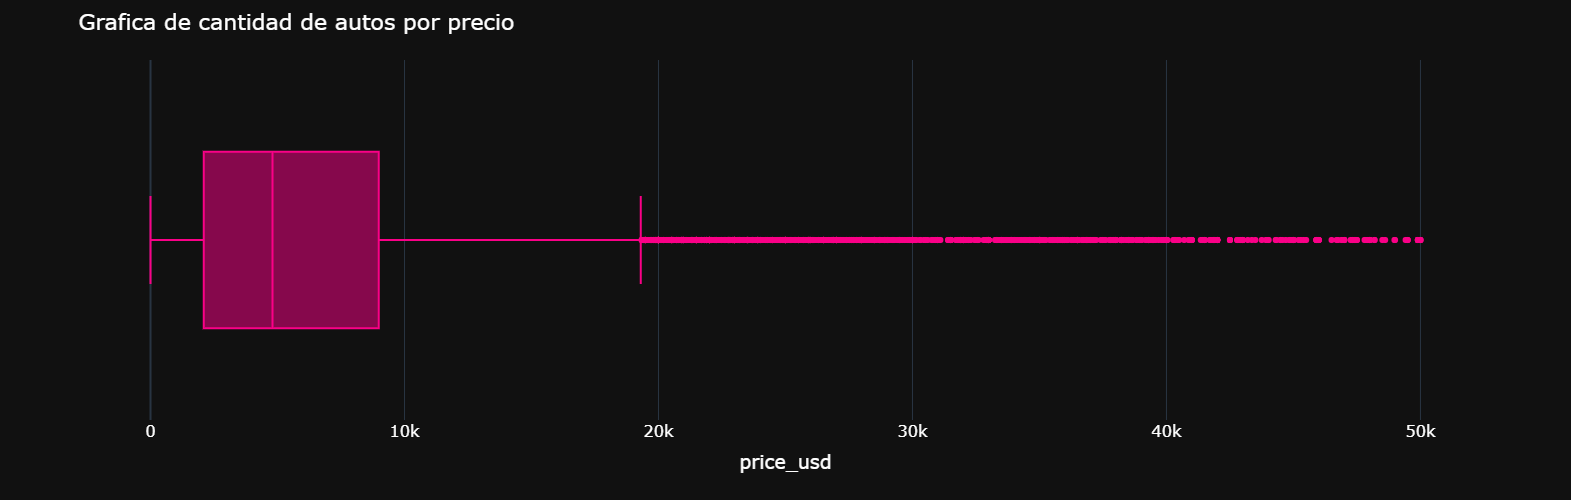

In [26]:
fig1 = px.histogram(df, 
                    x="price_usd",
                    opacity=0.8, 
                    color_discrete_sequence=['#FA0087'])

fig1.update_layout(title = 'Grafica de cantidad de autos por precio',
                 font = dict(family = 'verdana', size = 16, color = 'white'),
                 template = 'plotly_dark',
                 height = 500,
                 width = 900)
fig1.show()


fig2 = px.box(df, 
              x='price_usd', 
              color_discrete_sequence=['#FA0087'])

fig2.update_layout(title = 'Grafica de cantidad de autos por precio',
                 font = dict(family = 'verdana', size = 16, color = 'white'),
                 template = 'plotly_dark',
                 height = 500,
                 width = 900)
fig2.show()

Es posible calcular varios box-plot separando por una cierta variable categórica:

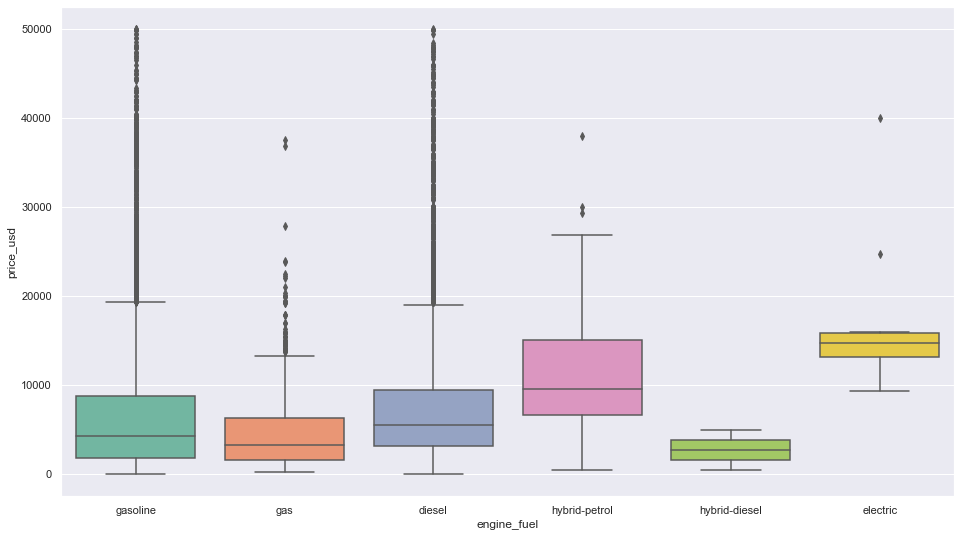

In [28]:
fig = plt.figure(figsize=(16,9))

g = sns.boxplot(x = 'engine_fuel', 
                y = 'price_usd', 
                data = df, 
                palette='Set2')

plt.show()

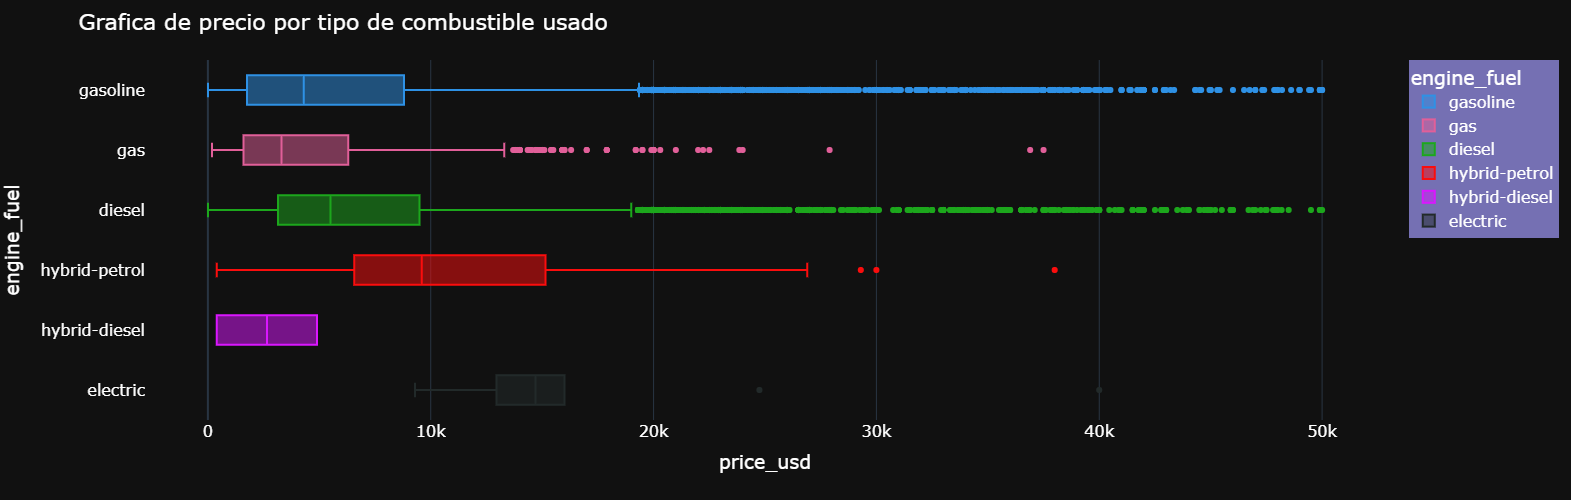

In [27]:
fig = px.box(df, 
             x='price_usd', 
             y='engine_fuel', 
             color = 'engine_fuel',
             color_discrete_sequence=px.colors.qualitative.Dark24)

fig.update_layout(title = 'Grafica de precio por tipo de combustible usado',
                  font = dict(family = 'verdana', size = 16, color = 'white'),
                  template = 'plotly_dark',
                  height = 500,
                  width = 900,
                  legend_bgcolor='rgb(117, 112, 179)')

fig.show()